In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df100 = pd.read_csv("dataset_sudeste_simples_realista_outliers-100.csv")
df1000 = pd.read_csv("dataset_sudeste_simples_realista_outliers-1K.csv")
df2000 = pd.read_csv("dataset_sudeste_simples_realista_outliers-2K.csv")

In [3]:
df100.columns.tolist() #listar colunas de tabela de 100 linhas
df1000.columns.tolist() #listar colunas de tabela de 1000 linhas
df2000.columns.tolist() #listar colunas de tabela de 2000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df100['idade'] = df100['idade'].fillna(0)
df100['renda'] = df100['renda'].fillna(0)
df100['cidade'] = df100['cidade'].fillna(0)
df100['categoria'] = df100['categoria'].fillna(0)
df100['nota'] = df100['nota'].fillna(0)
df100['feedback'] = df100['feedback'].fillna(0)

# Tratamento de NaN(nulos) - converter para 0 - tabela de 1000 linhas
df1000['idade'] = df1000['idade'].fillna(0)
df1000['renda'] = df1000['renda'].fillna(0)
df1000['cidade'] = df1000['cidade'].fillna(0)
df1000['categoria'] = df1000['categoria'].fillna(0)
df1000['nota'] = df1000['nota'].fillna(0)
df1000['feedback'] = df1000['feedback'].fillna(0)

# Tratamento de NaN(nulos) - converter para 0 - tabela de 2000 linhas
df2000['idade'] = df2000['idade'].fillna(0)
df2000['renda'] = df2000['renda'].fillna(0)
df2000['cidade'] = df2000['cidade'].fillna(0)
df2000['categoria'] = df2000['categoria'].fillna(0)
df2000['nota'] = df2000['nota'].fillna(0)
df2000['feedback'] = df2000['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 100 linhas
display(df100.head(100))

#feedbackisualização de tabela tratada de 1000 linhas
display(df1000.head(1000))

#feedbackisualização de tabela tratada de 2000 linhas
display(df2000.head(2000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,41.0,7581.61,Rio de Janeiro,B,8.4,Ruim
1,2,38.0,8626.87,Belo Horizonte,A,2.2,Ruim
2,3,65.0,7742.99,São Paulo,A,1.2,Bom
3,4,59.0,6357.36,Vitória,B,9.5,Ruim
4,5,63.0,11899.30,Vitória,A,1.2,Bom
...,...,...,...,...,...,...,...
95,96,51.0,9112.51,Belo Horizonte,A,5.9,Regular
96,97,37.0,6098.80,Belo Horizonte,B,2.0,Regular
97,98,18.0,11708.21,Rio de Janeiro,B,5.7,Ruim
98,99,29.0,3429.34,Vitória,B,8.0,Regular


,id,idade,renda,cidade,categoria,nota,feedback
0,1,25.0,9508.30,Belo Horizonte,A,2.6,Regular
1,2,53.0,2346.15,São Paulo,A,1.6,Ruim
2,3,52.0,7578.47,Vitória,B,7.8,Regular
3,4,52.0,12940.35,São Paulo,B,9.4,Regular
4,5,59.0,4343.05,Vitória,A,3.9,Ruim
...,...,...,...,...,...,...,...
995,996,59.0,12104.07,Rio de Janeiro,A,5.6,Ruim
996,997,31.0,12985.83,Vitória,A,2.5,Ruim
997,998,18.0,2184.16,Vitória,B,0.1,Regular
998,999,18.0,11314.51,Belo Horizonte,B,9.3,Ruim


,id,idade,renda,cidade,categoria,nota,feedback
0,1,25.0,8861.10,São Paulo,A,5.5,Regular
1,2,31.0,4553.40,Belo Horizonte,B,8.4,Regular
2,3,48.0,8259.38,Rio de Janeiro,B,6.9,Regular
3,4,37.0,10690.56,Rio de Janeiro,A,5.7,Bom
4,5,48.0,9732.75,Rio de Janeiro,A,9.2,Bom
...,...,...,...,...,...,...,...
1995,1996,58.0,10338.47,Vitória,B,7.5,Bom
1996,1997,24.0,6455.35,Rio de Janeiro,B,1.4,Ruim
1997,1998,25.0,9565.07,Vitória,B,0.8,Bom
1998,1999,67.0,12117.89,Belo Horizonte,B,4.2,Bom


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem

print("\n### Descrição Estatística 100###")
print(df100.describe())
print("\n\n")

print("\n### Descrição Estatística 1000###")
print(df1000.describe())
print("\n\n")

print("\n### Descrição Estatística 2000###")
print(df2000.describe())
print("\n\n")


### Descrição Estatística 100###
               id       idade         renda        nota
count  100.000000  100.000000    100.000000  100.000000
mean    50.500000   43.640000   6824.041500    4.752000
std     29.011492   16.458408   3228.195966    2.884493
min      1.000000    0.000000      0.000000    0.000000
25%     25.750000   31.500000   4019.375000    2.175000
50%     50.500000   43.000000   6256.895000    4.900000
75%     75.250000   58.250000   9294.100000    7.100000
max    100.000000   70.000000  12964.100000    9.600000




### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    42.954000   7109.053000     4.957500
std     288.819436    17.060039   3842.999966     2.996696
min       1.000000     0.000000      0.000000    -1.400000
25%     250.750000    28.000000   4039.030000     2.300000
50%     500.500000    43.500000   7100.100000     4.900000
75%     750

In [7]:
# Cálculos Estatísticos de idade

media_idade100 = sum(df100['idade'])/len(df100['idade'])
mediana_idade100 = df100['idade'].median()
desvio_padrao_idade100 = df100['idade'].std()
maximo_idade100 = df100['idade'].max()
minimo_idade100 = df100['idade'].min()

print('Média de Idade - 100 Elementos:',round(media_idade100,0))
print('Mediana de Idade - 100 Elementos:',round(mediana_idade100,0))
print('Desvio Padrão de Idade - 100 Elementos:',round(desvio_padrao_idade100,0))
print('Maior Valor de Idade - 100 Elementos:',round(maximo_idade100,0))
print('Menor Valor de Idade - 100 Elementos:',round(minimo_idade100,0))
print('\n')

media_idade1000 = sum(df1000['idade'])/len(df1000['idade'])
mediana_idade1000 = df1000['idade'].median()
desvio_padrao_idade1000 = df1000['idade'].std()
maximo_idade1000 = df1000['idade'].max()
minimo_idade1000 = df1000['idade'].min()

print('Média de Idade - 1000 Elementos:',round(media_idade1000,0))
print('Mediana de Idade - 1000 Elementos:',round(mediana_idade1000,0))
print('Desvio Padrão de Idade - 1000 Elementos:',round(desvio_padrao_idade1000,0))
print('Maior Valor de Idade - 1000 Elementos:',round(maximo_idade1000,0))
print('Menor Valor de Idade - 1000 Elementos:',round(minimo_idade1000,0))
print('\n')

media_idade2000 = sum(df2000['idade'])/len(df2000['idade'])
mediana_idade2000 = df2000['idade'].median()
desvio_padrao_idade2000 = df2000['idade'].std()
maximo_idade2000 = df2000['idade'].max()
minimo_idade2000 = df2000['idade'].min()

print('Média de Idade - 2000 Elementos:',round(media_idade2000,0))
print('Mediana de Idade - 2000 Elementos:',round(mediana_idade2000,0))
print('Desvio Padrão de Idade - 2000 Elementos:',round(desvio_padrao_idade2000,0))
print('Maior Valor de Idade - 2000 Elementos:',round(maximo_idade2000,0))
print('Menor Valor de Idade - 2000 Elementos:',round(minimo_idade2000,0))
print('\n')

Média de Idade - 100 Elementos: 44.0
Mediana de Idade - 100 Elementos: 43.0
Desvio Padrão de Idade - 100 Elementos: 16.0
Maior Valor de Idade - 100 Elementos: 70.0
Menor Valor de Idade - 100 Elementos: 0.0


Média de Idade - 1000 Elementos: 43.0
Mediana de Idade - 1000 Elementos: 44.0
Desvio Padrão de Idade - 1000 Elementos: 17.0
Maior Valor de Idade - 1000 Elementos: 112.0
Menor Valor de Idade - 1000 Elementos: 0.0


Média de Idade - 2000 Elementos: 43.0
Mediana de Idade - 2000 Elementos: 43.0
Desvio Padrão de Idade - 2000 Elementos: 17.0
Maior Valor de Idade - 2000 Elementos: 120.0
Menor Valor de Idade - 2000 Elementos: 0.0




In [8]:
# Cálculos Estatísticos de renda

media_renda100 = sum(df100['renda'])/len(df100['renda'])
mediana_renda100 = df100['renda'].median()
desvio_padrao_renda100 = df100['renda'].std()
maximo_renda100 = df100['renda'].max()
minimo_renda100 = df100['renda'].min()

print('Média de Renda - 100 Elementos:',round(media_renda100,2))
print('Mediana de Renda - 100 Elementos:',round(mediana_renda100,2))
print('Desvio Padrão de Renda - 100 Elementos:',round(desvio_padrao_renda100,2))
print('Maior Valor de Renda - 100 Elementos:',round(maximo_renda100,2))
print('Menor Valor de Renda - 100 Elementos:',round(minimo_renda100,2))
print('\n')

media_renda1000 = sum(df1000['renda'])/len(df1000['renda'])
mediana_renda1000 = df1000['renda'].median()
desvio_padrao_renda1000 = df1000['renda'].std()
maximo_renda1000 = df1000['renda'].max()
minimo_renda1000 = df1000['renda'].min()

print('Média de Renda - 1000 Elementos:',round(media_renda1000,2))
print('Mediana de Renda - 1000 Elementos:',round(mediana_renda1000,2))
print('Desvio Padrão de Renda - 1000 Elementos:',round(desvio_padrao_renda1000,2))
print('Maior Valor de Renda - 1000 Elementos:',round(maximo_renda1000,2))
print('Menor Valor de Renda - 1000 Elementos:',round(minimo_renda1000,2))
print('\n')

media_renda2000 = sum(df2000['renda'])/len(df2000['renda'])
mediana_renda2000 = df2000['renda'].median()
desvio_padrao_renda2000 = df2000['renda'].std()
maximo_renda2000 = df2000['renda'].max()
minimo_renda2000 = df2000['renda'].min()

print('Média de Renda - 2000 Elementos:',round(media_renda2000,2))
print('Mediana de Renda - 2000 Elementos:',round(mediana_renda2000,2))
print('Desvio Padrão de Renda - 2000 Elementos:',round(desvio_padrao_renda2000,2))
print('Maior Valor de Renda - 2000 Elementos:',round(maximo_renda2000,2))
print('Menor Valor de Renda - 2000 Elementos:',round(minimo_renda2000,2))
print('\n')

Média de Renda - 100 Elementos: 6824.04
Mediana de Renda - 100 Elementos: 6256.9
Desvio Padrão de Renda - 100 Elementos: 3228.2
Maior Valor de Renda - 100 Elementos: 12964.1
Menor Valor de Renda - 100 Elementos: 0.0


Média de Renda - 1000 Elementos: 7109.05
Mediana de Renda - 1000 Elementos: 7100.1
Desvio Padrão de Renda - 1000 Elementos: 3843.0
Maior Valor de Renda - 1000 Elementos: 38099.88
Menor Valor de Renda - 1000 Elementos: 0.0


Média de Renda - 2000 Elementos: 7152.86
Mediana de Renda - 2000 Elementos: 7080.26
Desvio Padrão de Renda - 2000 Elementos: 4286.64
Maior Valor de Renda - 2000 Elementos: 48514.76
Menor Valor de Renda - 2000 Elementos: 0.0




In [9]:
# Cálculos Estatísticos de nota

media_nota100 = sum(df100['nota'])/len(df100['nota'])
mediana_nota100 = df100['nota'].median()
desvio_padrao_nota100 = df100['nota'].std()
maximo_nota100 = df100['nota'].max()
minimo_nota100 = df100['nota'].min()

print('Média de Nota - 100 Elementos:',round(media_nota100,2))
print('Mediana de Nota - 100 Elementos:',round(mediana_nota100,2))
print('Desvio Padrão de Nota - 100 Elementos:',round(desvio_padrao_nota100,2))
print('Maior Valor de Nota - 100 Elementos:',round(maximo_nota100,2))
print('Menor Valor de Nota - 100 Elementos:',round(minimo_nota100,2))
print('\n')

media_nota1000 = sum(df1000['nota'])/len(df1000['nota'])
mediana_nota1000 = df1000['nota'].median()
desvio_padrao_nota1000 = df1000['nota'].std()
maximo_nota1000 = df1000['nota'].max()
minimo_nota1000 = df1000['nota'].min()

print('Média de Nota - 1000 Elementos:',round(media_nota1000,2))
print('Mediana de Nota - 1000 Elementos:',round(mediana_nota1000,2))
print('Desvio Padrão de Nota - 1000 Elementos:',round(desvio_padrao_nota1000,2))
print('Maior Valor de Nota - 1000 Elementos:',round(maximo_nota1000,2))
print('Menor Valor de Nota - 1000 Elementos:',round(minimo_nota1000,2))
print('\n')

media_nota2000 = sum(df2000['nota'])/len(df2000['nota'])
mediana_nota2000 = df2000['nota'].median()
desvio_padrao_nota2000 = df2000['nota'].std()
maximo_nota2000 = df2000['nota'].max()
minimo_nota2000 = df2000['nota'].min()

print('Média de Nota - 2000 Elementos:',round(media_nota2000,2))
print('Mediana de Nota - 2000 Elementos:',round(mediana_nota2000,2))
print('Desvio Padrão de Nota - 2000 Elementos:',round(desvio_padrao_nota2000,2))
print('Maior Valor de Nota - 2000 Elementos:',round(maximo_nota2000,2))
print('Menor Valor de Nota - 2000 Elementos:',round(minimo_nota2000,2))
print('\n')

Média de Nota - 100 Elementos: 4.75
Mediana de Nota - 100 Elementos: 4.9
Desvio Padrão de Nota - 100 Elementos: 2.88
Maior Valor de Nota - 100 Elementos: 9.6
Menor Valor de Nota - 100 Elementos: 0.0


Média de Nota - 1000 Elementos: 4.96
Mediana de Nota - 1000 Elementos: 4.9
Desvio Padrão de Nota - 1000 Elementos: 3.0
Maior Valor de Nota - 1000 Elementos: 14.7
Menor Valor de Nota - 1000 Elementos: -1.4


Média de Nota - 2000 Elementos: 4.95
Mediana de Nota - 2000 Elementos: 5.0
Desvio Padrão de Nota - 2000 Elementos: 3.05
Maior Valor de Nota - 2000 Elementos: 14.9
Menor Valor de Nota - 2000 Elementos: -4.9




In [10]:
#Calculando o IQR e identificando os limites - Renda

Q1_renda100 = df100['renda'].quantile(0.25)
Q3_renda100 = df100['renda'].quantile(0.75)
IQR_renda100 = Q3_renda100 - Q1_renda100
limite_inferior_renda100 = Q1_renda100 - 1.5 * IQR_renda100
limite_superior_renda100 = Q3_renda100 + 1.5 * IQR_renda100

print (f"\n\n\t IQR - Campo Renda - 100\n\n")
print(f"Quartis -> Q1: {Q1_renda100:-8.2f}  ->  Q3: {Q3_renda100:-8.2f}")
print(f"IQR ----- {IQR_renda100}")
print(f"Limites - Inf: {limite_inferior_renda100:-8.2f}  -> Sup: {limite_superior_renda100:-8.2f}")
print(f"\n\n")

Q1_renda1000 = df1000['renda'].quantile(0.25)
Q3_renda1000 = df1000['renda'].quantile(0.75)
IQR_renda1000 = Q3_renda1000 - Q1_renda1000
limite_inferior_renda1000 = Q1_renda1000 - 1.5 * IQR_renda1000
limite_superior_renda1000 = Q3_renda1000 + 1.5 * IQR_renda1000

print (f"\n\n\t IQR - Campo Renda - 1000\n\n")
print(f"Quartis -> Q1: {Q1_renda1000:-8.2f}  ->  Q3: {Q3_renda1000:-8.2f}")
print(f"IQR ----- {IQR_renda1000}")
print(f"Limites - Inf: {limite_inferior_renda1000:-8.2f}  -> Sup: {limite_superior_renda1000:-8.2f}")
print(f"\n\n")

Q1_renda2000 = df2000['renda'].quantile(0.25)
Q3_renda2000 = df2000['renda'].quantile(0.75)
IQR_renda2000 = Q3_renda2000 - Q1_renda2000
limite_inferior_renda2000 = Q1_renda2000 - 1.5 * IQR_renda2000
limite_superior_renda2000 = Q3_renda2000 + 1.5 * IQR_renda2000

print (f"\n\n\t IQR - Campo Renda - 2000\n\n")
print(f"Quartis -> Q1: {Q1_renda2000:-8.2f}  ->  Q3: {Q3_renda2000:-8.2f}")
print(f"IQR ----- {IQR_renda2000}")
print(f"Limites - Inf: {limite_inferior_renda2000:-8.2f}  -> Sup: {limite_superior_renda2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Renda - 100


Quartis -> Q1:  4019.38  ->  Q3:  9294.10
IQR ----- 5274.7249999999985
Limites - Inf: -3892.71  -> Sup: 17206.19





	 IQR - Campo Renda - 1000


Quartis -> Q1:  4039.03  ->  Q3: 10208.39
IQR ----- 6169.362499999999
Limites - Inf: -5215.01  -> Sup: 19462.44





	 IQR - Campo Renda - 2000


Quartis -> Q1:  3867.22  ->  Q3: 10220.97
IQR ----- 6353.75
Limites - Inf: -5663.40  -> Sup: 19751.60





In [11]:
#Calculando o IQR e identificando os limites - Idade

Q1_idade100 = df100['idade'].quantile(0.25)
Q3_idade100 = df100['idade'].quantile(0.75)
IQR_idade100 = Q3_idade100 - Q1_idade100
limite_inferior_idade100 = Q1_idade100 - 1.5 * IQR_idade100
limite_superior_idade100 = Q3_idade100 + 1.5 * IQR_idade100

print (f"\n\n\t IQR - Campo Idade - 100\n\n")
print(f"Quartis -> Q1: {Q1_idade100:-8.2f}  ->  Q3: {Q3_idade100:-8.2f}")
print(f"IQR ----- {IQR_idade100}")
print(f"Limites - Inf: {limite_inferior_idade100:-8.2f}  -> Sup: {limite_superior_idade100:-8.2f}")
print(f"\n\n")

Q1_idade1000 = df1000['idade'].quantile(0.25)
Q3_idade1000 = df1000['idade'].quantile(0.75)
IQR_idade1000 = Q3_idade1000 - Q1_idade1000
limite_inferior_idade1000 = Q1_idade1000 - 1.5 * IQR_idade1000
limite_superior_idade1000 = Q3_idade1000 + 1.5 * IQR_idade1000

print (f"\n\n\t IQR - Campo Idade - 1000\n\n")
print(f"Quartis -> Q1: {Q1_idade1000:-8.2f}  ->  Q3: {Q3_idade1000:-8.2f}")
print(f"IQR ----- {IQR_idade1000}")
print(f"Limites - Inf: {limite_inferior_idade1000:-8.2f}  -> Sup: {limite_superior_idade1000:-8.2f}")
print(f"\n\n")

Q1_idade2000 = df2000['idade'].quantile(0.25)
Q3_idade2000 = df2000['idade'].quantile(0.75)
IQR_idade2000 = Q3_idade2000 - Q1_idade2000
limite_inferior_idade2000 = Q1_idade2000 - 1.5 * IQR_idade2000
limite_superior_idade2000 = Q3_idade2000 + 1.5 * IQR_idade2000

print (f"\n\n\t IQR - Campo Idade - 2000\n\n")
print(f"Quartis -> Q1: {Q1_idade2000:-8.2f}  ->  Q3: {Q3_idade2000:-8.2f}")
print(f"IQR ----- {IQR_idade2000}")
print(f"Limites - Inf: {limite_inferior_idade2000:-8.2f}  -> Sup: {limite_superior_idade2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Idade - 100


Quartis -> Q1:    31.50  ->  Q3:    58.25
IQR ----- 26.75
Limites - Inf:    -8.62  -> Sup:    98.38





	 IQR - Campo Idade - 1000


Quartis -> Q1:    28.00  ->  Q3:    57.00
IQR ----- 29.0
Limites - Inf:   -15.50  -> Sup:   100.50





	 IQR - Campo Idade - 2000


Quartis -> Q1:    29.00  ->  Q3:    58.00
IQR ----- 29.0
Limites - Inf:   -14.50  -> Sup:   101.50





In [12]:
#Calculando o IQR e identificando os limites - Nota

Q1_nota100 = df100['nota'].quantile(0.25)
Q3_nota100 = df100['nota'].quantile(0.75)
IQR_nota100 = Q3_nota100 - Q1_nota100
limite_inferior_nota100 = Q1_nota100 - 1.5 * IQR_nota100
limite_superior_nota100 = Q3_nota100 + 1.5 * IQR_nota100

print (f"\n\n\t IQR - Campo Nota - 100\n\n")
print(f"Quartis -> Q1: {Q1_nota100:-8.2f}  ->  Q3: {Q3_nota100:-8.2f}")
print(f"IQR ----- {IQR_nota100}")
print(f"Limites - Inf: {limite_inferior_nota100:-8.2f}  -> Sup: {limite_superior_nota100:-8.2f}")
print(f"\n\n")

Q1_nota1000 = df1000['nota'].quantile(0.25)
Q3_nota1000 = df1000['nota'].quantile(0.75)
IQR_nota1000 = Q3_nota1000 - Q1_nota1000
limite_inferior_nota1000 = Q1_nota1000 - 1.5 * IQR_nota1000
limite_superior_nota1000 = Q3_nota1000 + 1.5 * IQR_nota1000

print (f"\n\n\t IQR - Campo Nota - 1000\n\n")
print(f"Quartis -> Q1: {Q1_nota1000:-8.2f}  ->  Q3: {Q3_nota1000:-8.2f}")
print(f"IQR ----- {IQR_nota1000}")
print(f"Limites - Inf: {limite_inferior_nota1000:-8.2f}  -> Sup: {limite_superior_nota1000:-8.2f}")
print(f"\n\n")

Q1_nota2000 = df2000['nota'].quantile(0.25)
Q3_nota2000 = df2000['nota'].quantile(0.75)
IQR_nota2000 = Q3_nota2000 - Q1_nota2000
limite_inferior_nota2000 = Q1_nota2000 - 1.5 * IQR_nota2000
limite_superior_nota2000 = Q3_nota2000 + 1.5 * IQR_nota2000

print (f"\n\n\t IQR - Campo Nota - 2000\n\n")
print(f"Quartis -> Q1: {Q1_nota2000:-8.2f}  ->  Q3: {Q3_nota2000:-8.2f}")
print(f"IQR ----- {IQR_nota2000}")
print(f"Limites - Inf: {limite_inferior_nota2000:-8.2f}  -> Sup: {limite_superior_nota2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Nota - 100


Quartis -> Q1:     2.18  ->  Q3:     7.10
IQR ----- 4.924999999999999
Limites - Inf:    -5.21  -> Sup:    14.49





	 IQR - Campo Nota - 1000


Quartis -> Q1:     2.30  ->  Q3:     7.40
IQR ----- 5.1000000000000005
Limites - Inf:    -5.35  -> Sup:    15.05





	 IQR - Campo Nota - 2000


Quartis -> Q1:     2.40  ->  Q3:     7.40
IQR ----- 5.0
Limites - Inf:    -5.10  -> Sup:    14.90





In [13]:
#Outliers Renda

outliers_renda100 = df100[(df100['renda'] < limite_inferior_renda100) | (df100['renda'] > limite_superior_renda100)]
print(f"\n### Possíveis Outliers em 'renda' - 100 Elementos###\n\n{outliers_renda100}\n\n\n")

outliers_renda1000 = df1000[(df1000['renda'] < limite_inferior_renda1000) | (df1000['renda'] > limite_superior_renda1000)]
print(f"\n### Possíveis Outliers em 'renda' - 1000 Elementos###\n\n{outliers_renda1000}\n\n\n")

outliers_renda2000 = df2000[(df2000['renda'] < limite_inferior_renda2000) | (df2000['renda'] > limite_superior_renda2000)]
print(f"\n### Possíveis Outliers em 'renda' - 2000 Elementos###\n\n{outliers_renda2000}\n\n\n")


### Possíveis Outliers em 'renda' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
17    18   11.0  32889.27  Rio de Janeiro         B  12.6     Ruim
70    71    3.0  30285.53       São Paulo         B  11.9      Bom
641  642   77.0  38099.88  Rio de Janeiro         A  13.1      Bom




### Possíveis Outliers em 'renda' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
172    173  105.0  27857.71       São Paulo         A  -2.3     Ruim
820    821    9.0  22241.86  Rio de Janeiro         B  -1.4     Ruim
862    863   10.0  48514.76               0         A  13.8      Bom
1351  1352    1.0  46988.03  Belo Horizonte         B  -4.0      Bom
1459  1460    4.0  48081.63       São Paulo         A  -3.9      Bom
1513  1514   97.0  22326.64  Belo Horizonte         B  1

In [14]:
#Outliers Idade

outliers_idade100 = df100[(df100['idade'] < limite_inferior_idade100) | (df100['idade'] > limite_superior_idade100)]
print(f"\n### Possíveis Outliers em 'idade' - 100 Elementos###\n\n{outliers_idade100}\n\n\n")

outliers_idade1000 = df1000[(df1000['idade'] < limite_inferior_idade1000) | (df1000['idade'] > limite_superior_idade1000)]
print(f"\n### Possíveis Outliers em 'idade' - 1000 Elementos###\n\n{outliers_idade1000}\n\n\n")

outliers_idade2000 = df2000[(df2000['idade'] < limite_inferior_idade2000) | (df2000['idade'] > limite_superior_idade2000)]
print(f"\n### Possíveis Outliers em 'idade' - 2000 Elementos###\n\n{outliers_idade2000}\n\n\n")


### Possíveis Outliers em 'idade' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'idade' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
278  279  112.0    431.21  Belo Horizonte         A  10.9  Regular
324  325  111.0   1141.65  Rio de Janeiro         B  14.7      Bom
363  364  108.0  13441.54  Rio de Janeiro         A  13.1  Regular
384  385  109.0   1039.00       São Paulo         A  11.5     Ruim




### Possíveis Outliers em 'idade' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
172    173  105.0  27857.71       São Paulo         A  -2.3     Ruim
214    215  120.0   1095.33  Rio de Janeiro         A  12.0  Regular
469    470  115.0    975.36         Vitória         A  13.1     Ruim
882    883  118.0   1018.34  Rio de Janeiro         B  -2.6     Ruim
1053  1054  119.0    485.22       São Paulo         B  -2.

In [15]:
#Outliers Nota

outliers_nota100 = df100[(df100['nota'] < limite_inferior_nota100) | (df100['nota'] > limite_superior_nota100)]
print(f"\n### Possíveis Outliers em 'nota' - 100 Elementos###\n\n{outliers_nota100}\n\n\n")

outliers_nota1000 = df1000[(df1000['nota'] < limite_inferior_nota1000) | (df1000['nota'] > limite_superior_nota1000)]
print(f"\n### Possíveis Outliers em 'nota' - 1000 Elementos###\n\n{outliers_nota1000}\n\n\n")

outliers_nota2000 = df2000[(df2000['nota'] < limite_inferior_nota2000) | (df2000['nota'] > limite_superior_nota2000)]
print(f"\n### Possíveis Outliers em 'nota' - 2000 Elementos###\n\n{outliers_nota2000}\n\n\n")


### Possíveis Outliers em 'nota' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'nota' - 1000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'nota' - 2000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [16]:
#Conversão da planilha tratada para csv
df100.to_csv('Simples_Realista100_Tratado.csv', index=False)
df1000.to_csv('Simples_Realista1000_Tratado.csv', index=False)
df2000.to_csv('Simples_Realista2000_Tratado.csv', index=False)

In [17]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo100 = df100.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Simples_Realista100.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo100, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!


In [18]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo1000 = df1000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Simples_Realista1000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo1000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!


In [19]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo2000 = df2000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Simples_Realista2000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo2000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!


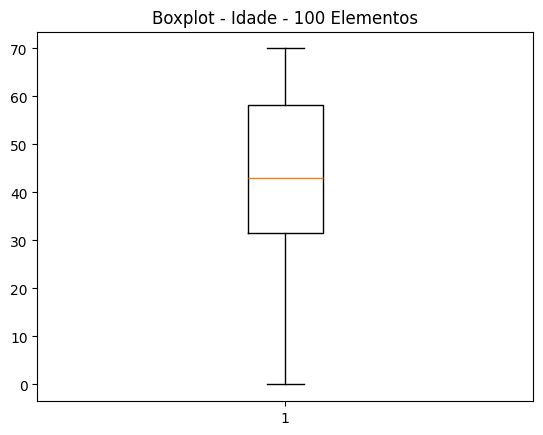

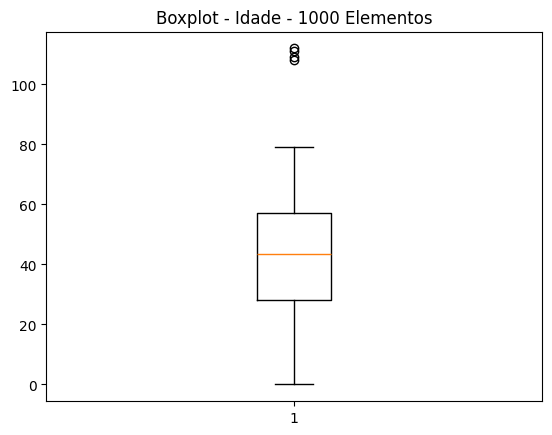

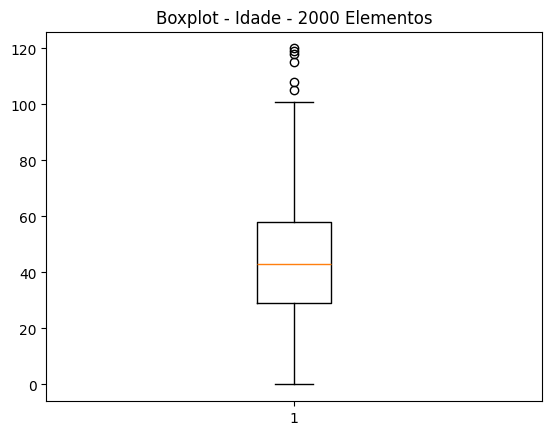

In [20]:
#Geração Gráfico - Idade - 100 linhas
plt.boxplot(df100['idade'])
plt.title("Boxplot - Idade - 100 Elementos")
plt.show()

#Geração Gráfico - Idade - 1000 linhas
plt.boxplot(df1000['idade'])
plt.title("Boxplot - Idade - 1000 Elementos")
plt.show()

#Geração Gráfico - Idade - 2000 linhas
plt.boxplot(df2000['idade'])
plt.title("Boxplot - Idade - 2000 Elementos")
plt.show()

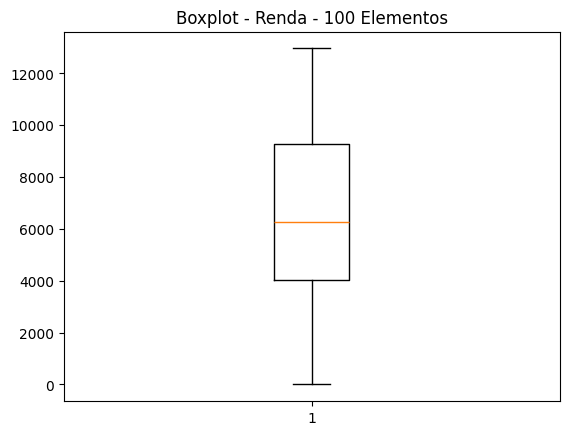

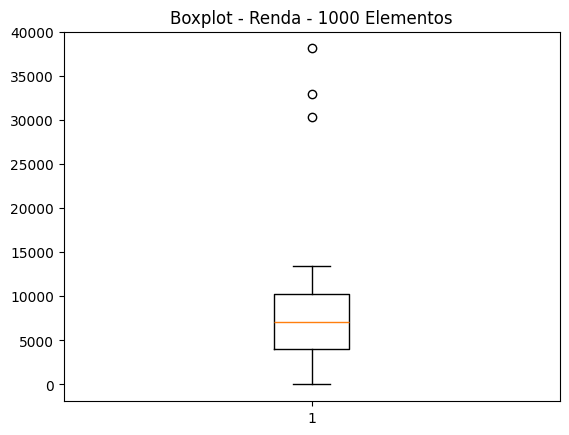

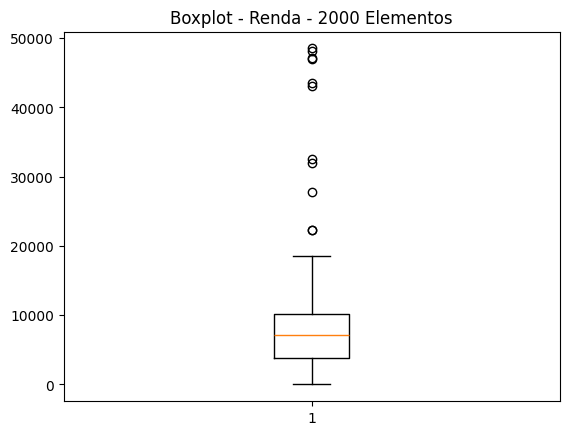

In [21]:
#Geração Gráfico - Renda - 100 linhas
plt.boxplot(df100['renda'])
plt.title("Boxplot - Renda - 100 Elementos")
plt.show()

#Geração Gráfico - Renda - 1000 linhas
plt.boxplot(df1000['renda'])
plt.title("Boxplot - Renda - 1000 Elementos")
plt.show()

#Geração Gráfico - Renda - 2000 linhas
plt.boxplot(df2000['renda'])
plt.title("Boxplot - Renda - 2000 Elementos")
plt.show()

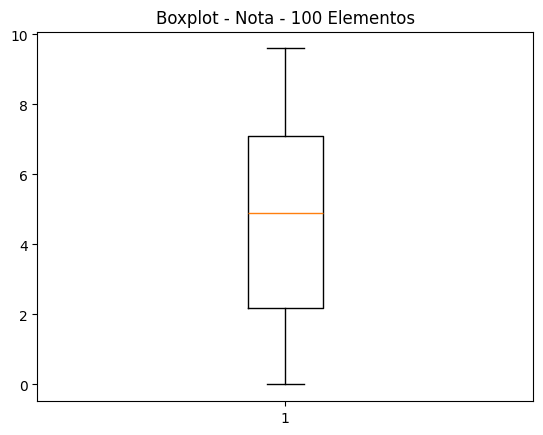

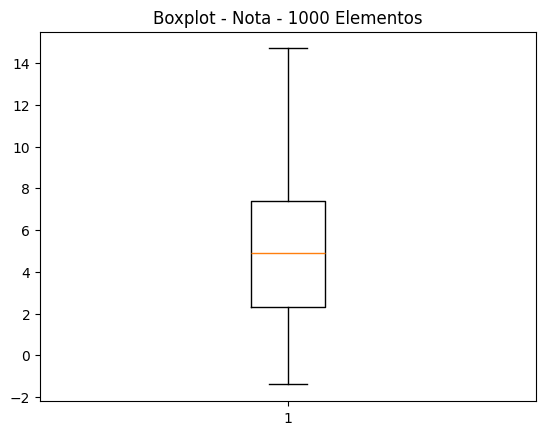

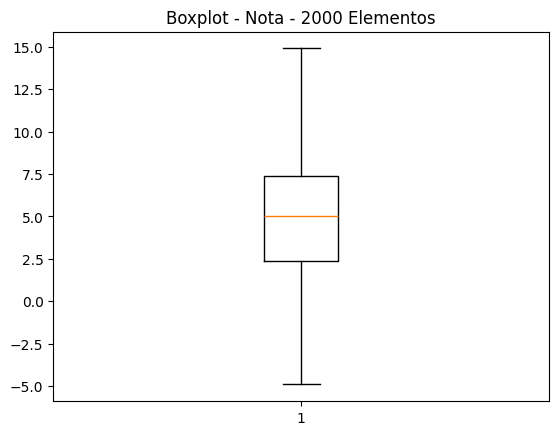

In [22]:
#Geração Gráfico - Nota - 100 linhas
plt.boxplot(df100['nota'])
plt.title("Boxplot - Nota - 100 Elementos")
plt.show()

#Geração Gráfico - Nota - 1000 linhas
plt.boxplot(df1000['nota'])
plt.title("Boxplot - Nota - 1000 Elementos")
plt.show()

#Geração Gráfico - Nota - 2000 linhas
plt.boxplot(df2000['nota'])
plt.title("Boxplot - Nota - 2000 Elementos")
plt.show()